# sorting arrays

In [20]:
# selection sort
# 选择排序：从当前第0项开始，找到后边最小的项，然后相互调换位置
import numpy as np

def selection_sort(x):
    for i in range(len(x)):  # 对数组进行遍历
        swap = i + np.argmin(x[i:])  # 找到从当前位置后面最小的数的索引，
#         print(i, swap)
        x[i], x[swap] = x[swap], x[i]
    return x

In [19]:
x = np.array([2,4,6,23,44,232,6,7567,43,5])
print(selection_sort(x))
%timeit selection_sort(x)

[   2    4    5    6    6   23   43   44  232 7567]
13.4 µs ± 168 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)


In [25]:
# bogosort

def bogosort(x):
    i = 0
    while np.any(x[:-1] > x[1:]):
        np.random.shuffle(x)
        print(i)
        i+= 1
    return x

In [28]:
bogosort(x)

array([   2,    4,    5,    6,    6,   23,   43,   44,  232, 7567])

## fast sorting in numpy : np.sort() and np.argsort()

In [30]:
# np.sort()  sorting the array and return it
x = np.array([1,34,231,41,2])
np.sort(x)

array([  1,   2,  34,  41, 231])

In [33]:
# np.argsort() return the sorted array indice
sort_indice = np.argsort(x)
print(sort_indice)

[0 4 1 3 2]


In [36]:
x[sort_indice]


array([  1,   2,  34,  41, 231])

### sorting along rows or colums

it will treat each row or colum as an independent array

In [61]:
rand = np.random.RandomState(42)
x = rand.randint(0, 10, (4,6))
print(x)

[[6 3 7 4 6 9]
 [2 6 7 4 3 7]
 [7 2 5 4 1 7]
 [5 1 4 0 9 5]]


In [56]:
# sort each colum of x
print(np.sort(x, axis=0))
# sort each row of x
print(np.sort(x, axis=1))

[[2 1 4 0 1 5]
 [5 2 5 4 3 7]
 [6 3 7 4 6 7]
 [7 6 7 4 9 9]]
[[3 4 6 6 7 9]
 [2 3 4 6 7 7]
 [1 2 4 5 7 7]
 [0 1 4 5 5 9]]


##  Partial Sorts: Partitioning

> Note that the first three values in the resulting array are the three smallest in the array, and the remaining array positions contain the remaining values. Within the two partitions, the elements have arbitrary order.

In [59]:
# np.partition(arrary, k)
X = np.array([7,2,3,1,6,5,4])
np.partition(X, 3)  # return the array which the smallest K values to the left


array([2, 1, 3, 4, 6, 5, 7])

In [63]:
np.partition(x, 2, axis=1)

array([[3, 4, 6, 7, 6, 9],
       [2, 3, 4, 7, 6, 7],
       [1, 2, 4, 5, 7, 7],
       [0, 1, 4, 5, 9, 5]])

## example: k-nearest neighbors
argsort()

In [65]:
x = rand.rand(10, 2)
x


array([[0.23089383, 0.24102547],
       [0.68326352, 0.60999666],
       [0.83319491, 0.17336465],
       [0.39106061, 0.18223609],
       [0.75536141, 0.42515587],
       [0.20794166, 0.56770033],
       [0.03131329, 0.84228477],
       [0.44975413, 0.39515024],
       [0.92665887, 0.727272  ],
       [0.32654077, 0.57044397]])

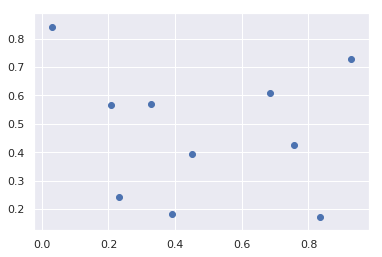

In [67]:
import matplotlib.pyplot as plt
import seaborn; seaborn.set()
plt.scatter(x[:,0], x[:,1])
plt.show()

In [75]:
dist_sq = np.sum((x[:, np.newaxis,:] - x[np.newaxis, :, :]) ** 2, axis=-1)

In [80]:
# print(x[:,np.newaxis,:].shape)
# print(x[np.newaxis,:,:])

In [83]:
# the above code can be broken down into its component steps

# for each pair of points, compute differeces in their coordinates
differeces = x[:,np.newaxis,:] - x[np.newaxis,:,:]
print(differeces.shape)

(10, 10, 2)


In [85]:
# square the coordinate differeces

sq_differences = differeces ** 2

print(sq_differences.shape)
print(sq_differences)

(10, 10, 2)
[[[0.00000000e+00 0.00000000e+00]
  [2.04638339e-01 1.36139740e-01]
  [3.62766598e-01 4.57798555e-03]
  [2.56533980e-02 3.45619099e-03]
  [2.75066247e-01 3.39040073e-02]
  [5.26801775e-04 1.06716465e-01]
  [3.98323892e-02 3.61512756e-01]
  [4.78998343e-02 2.37544447e-02]
  [4.84088991e-01 2.36435688e-01]
  [9.14833774e-03 1.08516554e-01]]

 [[2.04638339e-01 1.36139740e-01]
  [0.00000000e+00 0.00000000e+00]
  [2.24794226e-02 1.90647507e-01]
  [8.53825413e-02 1.82979105e-01]
  [5.19810596e-03 3.41661152e-02]
  [2.25930867e-01 1.78897953e-03]
  [4.25039098e-01 5.39577692e-02]
  [5.45266331e-02 4.61589850e-02]
  [5.92412949e-02 1.37535049e-02]
  [1.27251120e-01 1.56441476e-03]]

 [[3.62766598e-01 4.57798555e-03]
  [2.24794226e-02 1.90647507e-01]
  [0.00000000e+00 0.00000000e+00]
  [1.95482743e-01 7.87023462e-05]
  [6.05805394e-03 6.33988190e-02]
  [3.90941625e-01 1.55500624e-01]
  [6.43014131e-01 4.47454128e-01]
  [1.47026831e-01 4.91888446e-02]
  [8.73551071e-03 3.06813344e-01

In [94]:
# sum the coordinate differences to get the squared distance
dist_sq = sq_differences.sum(axis=-1) # equivalently (x1 - x2)^2 + (y1 - y2)^2
print(dist_sq)
print(dist_sq.shape)


[[0.         0.34077808 0.36734458 0.02910959 0.30897025 0.10724327
  0.40134515 0.07165428 0.72052468 0.11766489]
 [0.34077808 0.         0.21312693 0.26836165 0.03936422 0.22771985
  0.47899687 0.10068562 0.0729948  0.12881554]
 [0.36734458 0.21312693 0.         0.19556145 0.06945687 0.54644225
  1.09046826 0.19621568 0.31554885 0.41437041]
 [0.02910959 0.26836165 0.19556145 0.         0.1917251  0.18211523
  0.5650824  0.04877736 0.58392964 0.15486817]
 [0.30897025 0.03936422 0.06945687 0.1917251  0.         0.3199873
  0.6982422  0.09429615 0.12061697 0.20499577]
 [0.10724327 0.22771985 0.54644225 0.18211523 0.3199873  0.
  0.1065942  0.08824681 0.54201754 0.01407328]
 [0.40134515 0.47899687 1.09046826 0.5650824  0.6982422  0.1065942
  0.         0.37502203 0.81487163 0.16105668]
 [0.07165428 0.10068562 0.19621568 0.04877736 0.09429615 0.08824681
  0.37502203 0.         0.33774299 0.04590943]
 [0.72052468 0.0729948  0.31554885 0.58392964 0.12061697 0.54201754
  0.81487163 0.3377429

In [92]:
# print the diagonal of the matrix
dist_sq.diagonal()

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [95]:
nearest = np.argsort(dist_sq, axis=1)
print(nearest)

[[0 3 7 5 9 4 1 2 6 8]
 [1 4 8 7 9 2 5 3 0 6]
 [2 4 3 7 1 8 0 9 5 6]
 [3 0 7 9 5 4 2 1 6 8]
 [4 1 2 7 8 3 9 0 5 6]
 [5 9 7 6 0 3 1 4 8 2]
 [6 5 9 7 0 1 3 4 8 2]
 [7 9 3 0 5 4 1 2 8 6]
 [8 1 4 2 7 9 5 3 0 6]
 [9 5 7 0 1 3 6 4 8 2]]


RuntimeError: matplotlib does not support generators as input

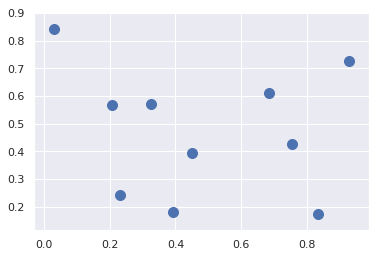

In [107]:
k = 2
nearest_partition = np.argpartition(dist_sq, k+1, axis=1)
plt.scatter(x[:,0], x[:,1], s=100)
for i in range(x.shape[0]):
    for j in nearest_partition[i: k+1]:
        
        plt.plot(*zip(x[j], x[i]), color='black')